# 1) Import the libraries

In [1]:
# data analysis libraries
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 2) Explore the dataset

In [2]:
df = pd.read_csv("dataset\IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
51,6.4,3.2,4.5,1.5,Iris-versicolor
105,7.6,3.0,6.6,2.1,Iris-virginica
21,5.1,3.7,1.5,0.4,Iris-setosa
122,7.7,2.8,6.7,2.0,Iris-virginica
133,6.3,2.8,5.1,1.5,Iris-virginica


In [6]:
# statistical summary of dataframe
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
# description of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.species.unique()     # unique items of iris species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Text(0, 0.5, 'Length / Width')

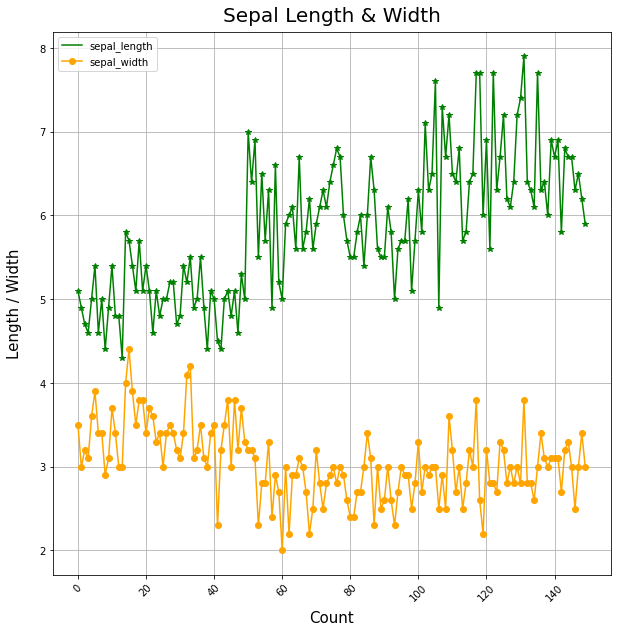

In [9]:
# Plot Sepal length and width

df['sepal_length'].plot(kind='line', legend=True, marker='*', color='green', figsize=(10,10), grid=True, rot=45)
df['sepal_width'].plot(kind='line', legend=True, marker="o", color='orange', figsize=(10,10), grid=True, rot=45)
plt.title('Sepal Length & Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'black','verticalalignment': 'baseline'})
plt.xlabel('Count', labelpad=20, loc='center', fontdict={'fontsize': 15, 'color': 'black','verticalalignment': 'baseline'})
plt.ylabel('Length / Width', labelpad=20, loc='center', fontdict={'fontsize': 15, 'color': 'black','verticalalignment': 'baseline'})

In [10]:
# Above plot shows that Sepal length is greater than Sepal width

Text(0, 0.5, 'Length / Width')

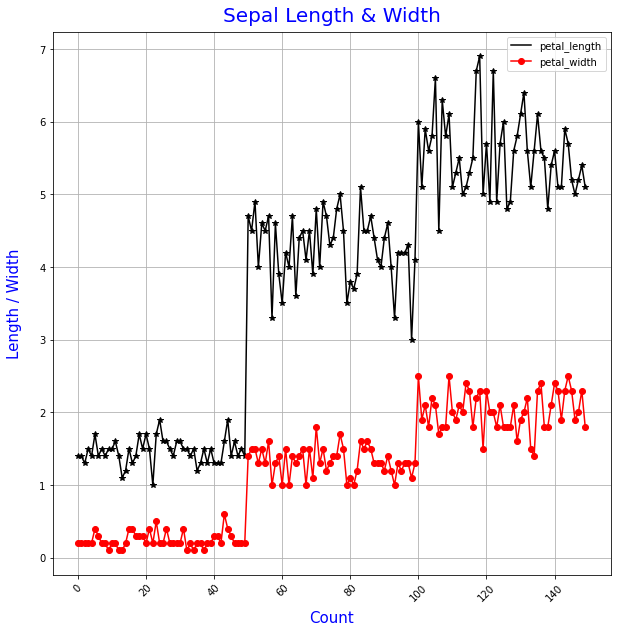

In [11]:
# Plot Sepal length and width

df['petal_length'].plot(kind='line', legend=True, marker='*', color='black', figsize=(10,10), grid=True, rot=45)
df['petal_width'].plot(kind='line', legend=True, marker="o", color='red', figsize=(10,10), grid=True, rot=45)
plt.title('Sepal Length & Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'blue','verticalalignment': 'baseline'})
plt.xlabel('Count', labelpad=20, loc='center', fontdict={'fontsize': 15, 'color': 'blue','verticalalignment': 'baseline'})
plt.ylabel('Length / Width', labelpad=20, loc='center', fontdict={'fontsize': 15, 'color': 'blue','verticalalignment': 'baseline'})

In [12]:
# Above plot shows that petal length is greater than petal width

Text(0, 0.5, 'Length / Width')

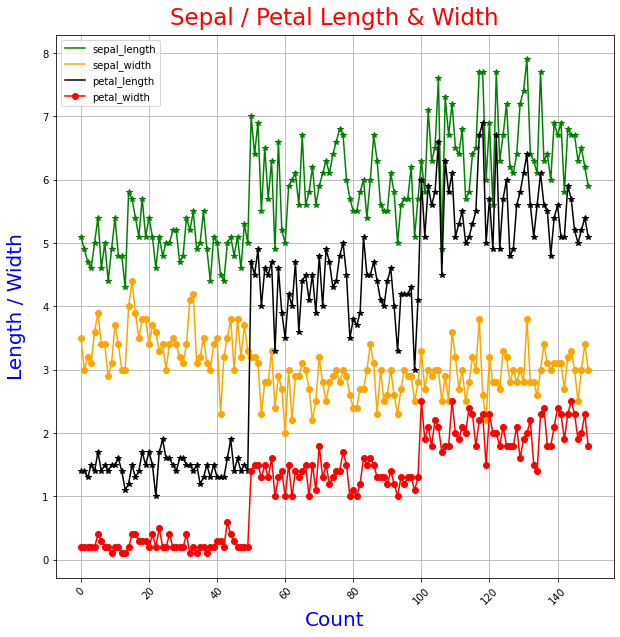

In [13]:
# Combine both sepal/petal length and width
# Plot Sepal length and width
df['sepal_length'].plot(kind='line', legend=True, marker='*', color='green', figsize=(10,10), grid=True, rot=45)
df['sepal_width'].plot(kind='line', legend=True, marker="o", color='orange', figsize=(10,10), grid=True, rot=45)

# Plot Petal length and width
df['petal_length'].plot(kind='line', legend=True, marker='*', color='black', figsize=(10,10), grid=True, rot=45)
df['petal_width'].plot(kind='line', legend=True, marker="o", color='red', figsize=(10,10), grid=True, rot=45)

# Set title, x_label, and y_label
plt.title('Sepal / Petal Length & Width',pad=10,loc='center',fontdict={'fontsize': 23, 'color': 'r','verticalalignment': 'baseline'})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 20, 'color': 'b','verticalalignment': 'baseline'})
plt.ylabel('Length / Width',labelpad=20,loc='center',fontdict={'fontsize': 20, 'color': 'b','verticalalignment': 'baseline'})

In [14]:
# Above plot shows the length and width of all features in a single plot which is easy to see which feature is smaller 
# or greater in length and width by seeing the plot

# 3) Data Visualization

<Figure size 720x720 with 0 Axes>

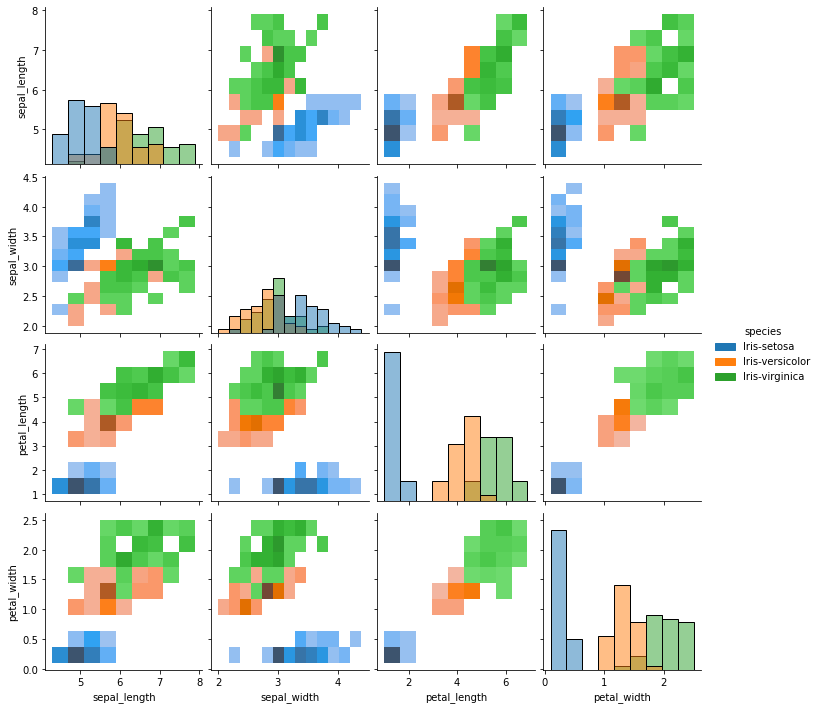

<Figure size 720x720 with 0 Axes>

In [15]:
# Show the impact of data of each feature using pairplot 
sns.pairplot(df, hue = 'species', kind = 'hist')
plt.figure(figsize = (10, 10))

<Figure size 720x720 with 0 Axes>

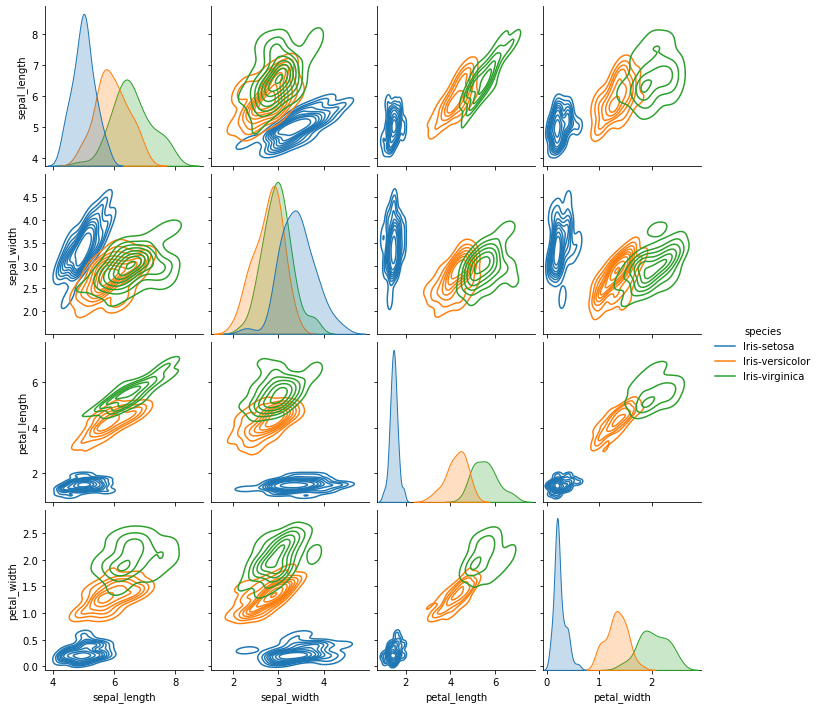

<Figure size 720x720 with 0 Axes>

In [16]:
# Another plot to show the same idea
sns.pairplot(df, hue = 'species', kind = 'kde')
plt.figure(figsize = (10, 10))

<Figure size 720x720 with 0 Axes>

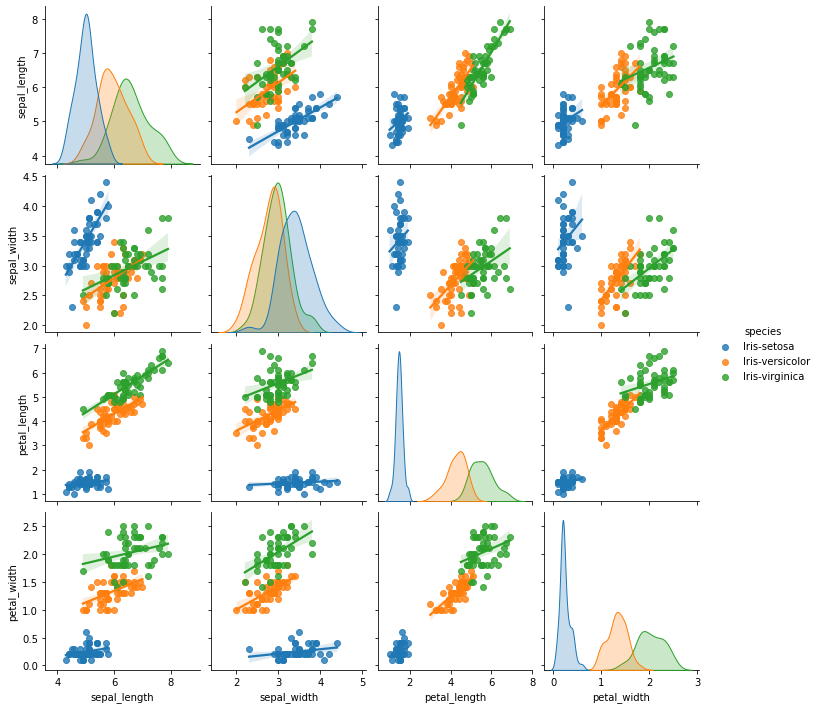

<Figure size 720x720 with 0 Axes>

In [17]:
# reg plot shows the correlation between the features 
sns.pairplot(df, hue = 'species', kind = 'reg')
plt.figure(figsize = (10, 10))

<Figure size 720x720 with 0 Axes>

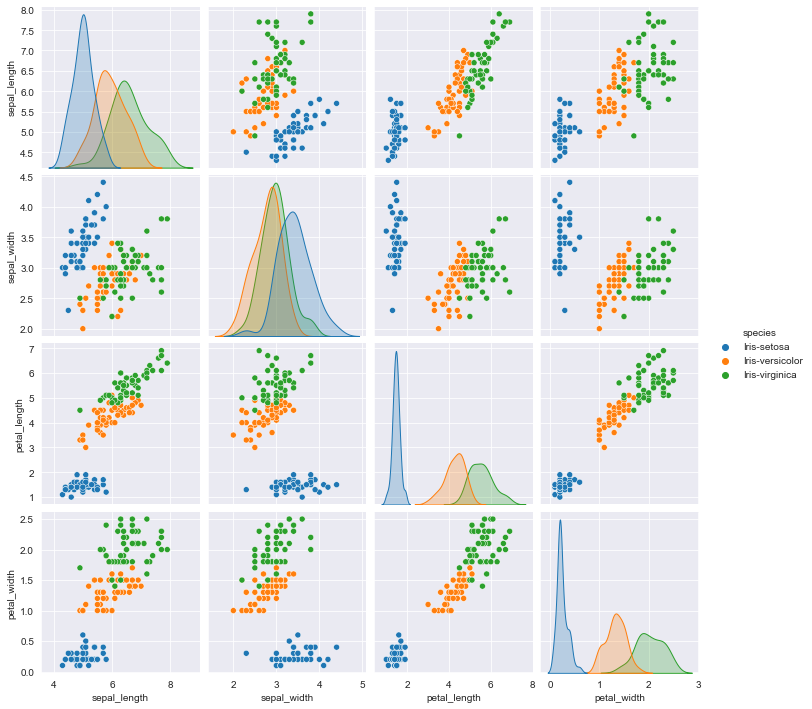

<Figure size 720x720 with 0 Axes>

In [18]:
# scatter plot to show the reach of data with the help of grid lines 
sns.set_style("darkgrid")
sns.pairplot(df, hue = 'species', kind = 'scatter')

plt.figure(figsize = (10, 10))

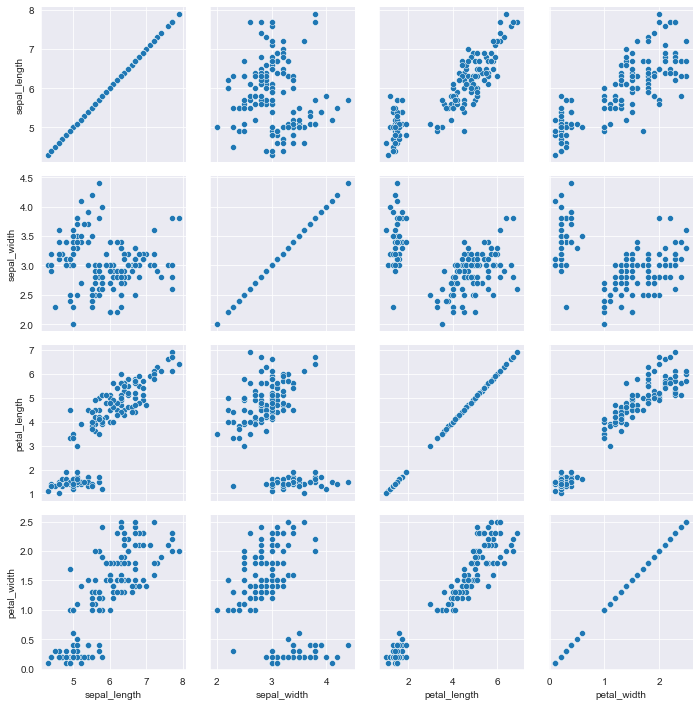

In [19]:
# PairGrid is more flexible in showing pairplot and scatterplot
plot = sns.PairGrid(df)
plot.map(sns.scatterplot)

<AxesSubplot:title={'center':'Species'}>

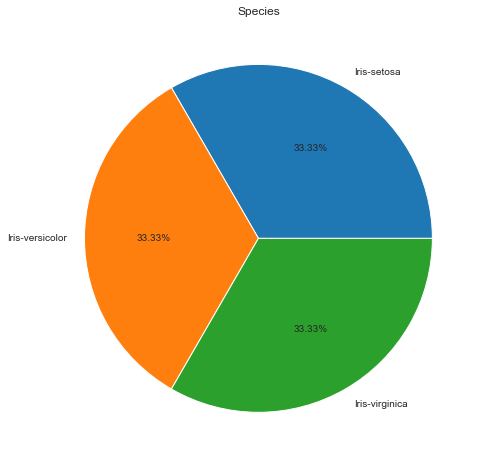

In [20]:
# pie chart shows that all three categories of iris flowers are in exactly equal amount (33.33%)
plt.figure(figsize=(8,8))
df['species'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', ylabel='', title = 'Species')

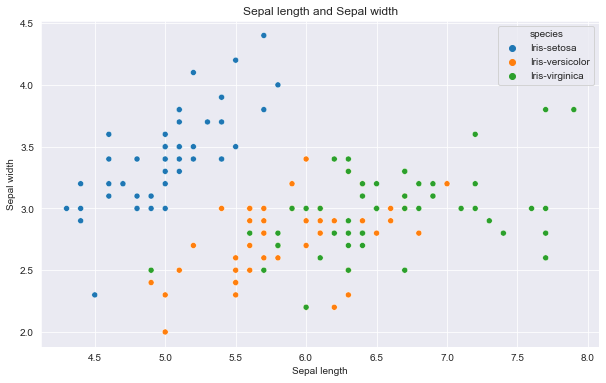

In [21]:
# Show the relationship between Sepal length and Sepal width with the help of scatter plot of different features
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df, x = 'sepal_length', y = 'sepal_width', hue = 'species')
plt.title('Sepal length and Sepal width')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

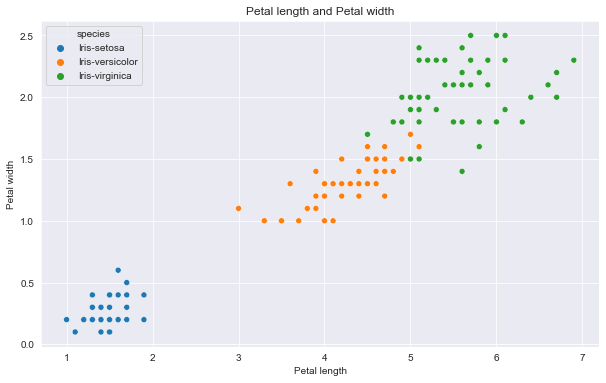

In [22]:
# Show the relationship between Petal length and Petal width with the help of scatter plot of different features 
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width', hue = 'species')
plt.title('Petal length and Petal width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

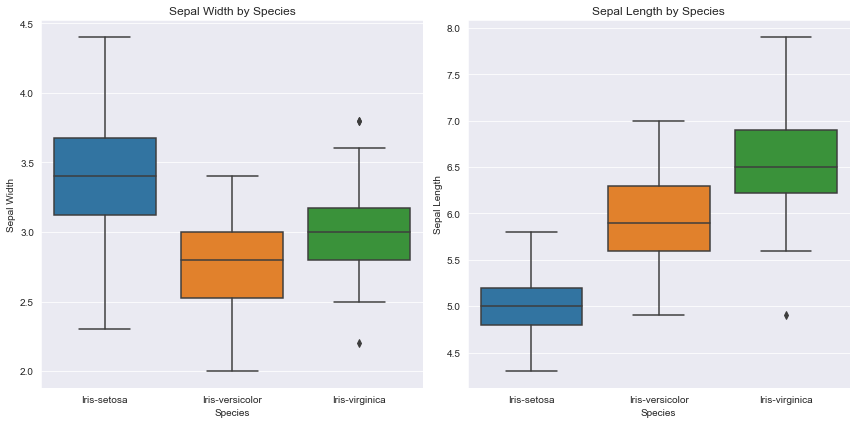

In [23]:
# Create subplots for sepal width and sepal length
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for sepal width
sns.boxplot(data=df, x='species', y='sepal_width', ax=axes[0])
axes[0].set_title('Sepal Width by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Sepal Width')

# Box plot for sepal length
sns.boxplot(data=df, x='species', y='sepal_length', ax=axes[1])
axes[1].set_title('Sepal Length by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Sepal Length')

plt.tight_layout()
plt.show()

In [24]:
# Boxplot basically shows the mean, variance and outliers in a simple and visible way
# Sepal length has more outliers (errors) than Sepal width

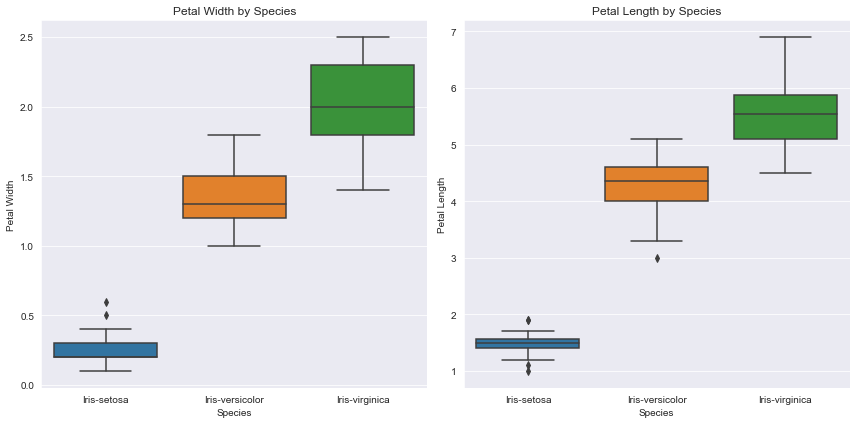

In [25]:
# Create subplots for petal width and petal length
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for petal width
sns.boxplot(data=df, x='species', y='petal_width', ax=axes[0])
axes[0].set_title('Petal Width by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Petal Width')

# Box plot for petal length
sns.boxplot(data=df, x='species', y='petal_length', ax=axes[1])
axes[1].set_title('Petal Length by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Petal Length')

plt.tight_layout()
plt.show()

In [26]:
# Boxplot basically shows the mean, variance and outliers in a simple and visible way
# Petal length has more outliers (errors) than Petal width

<Figure size 720x432 with 0 Axes>

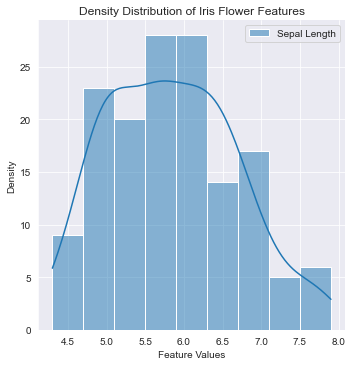

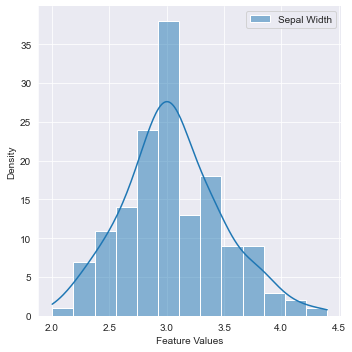

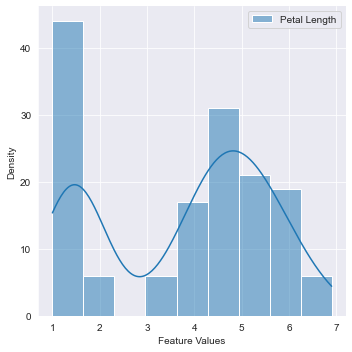

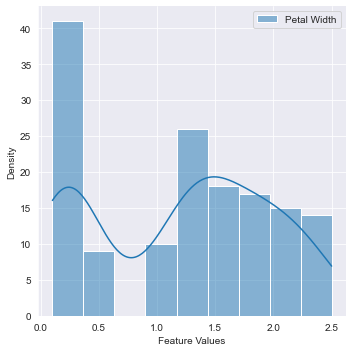

In [27]:
# Density distribution plots for the combination of different features
plt.figure(figsize=(10, 6))

sns.displot(data=df, x='sepal_length', label='Sepal Length', kde=True)
plt.title('Density Distribution of Iris Flower Features')
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.legend()

sns.displot(data=df, x='sepal_width', label='Sepal Width', kde=True)
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.legend()

sns.displot(data=df, x='petal_length', label='Petal Length', kde=True)
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.legend()

sns.displot(data=df, x='petal_width', label='Petal Width', kde=True)
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.legend()

plt.show()

In [28]:
# The plot of "Sepal Width" follows a normal distribution 

<Figure size 720x432 with 0 Axes>

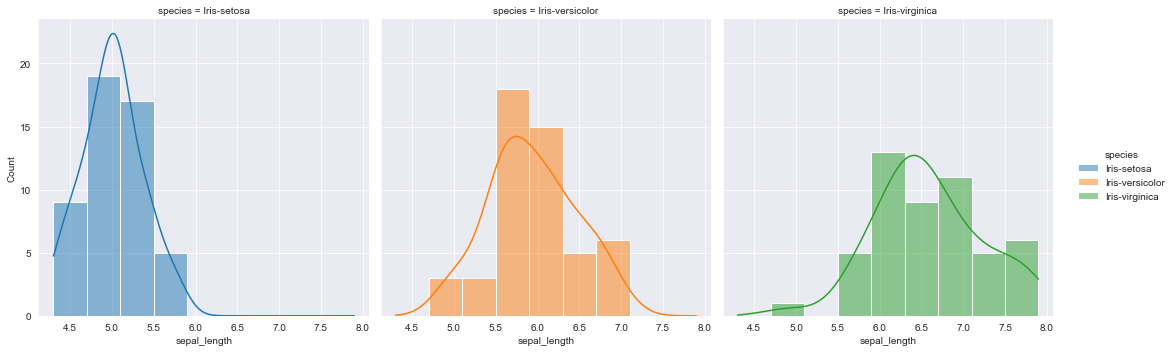

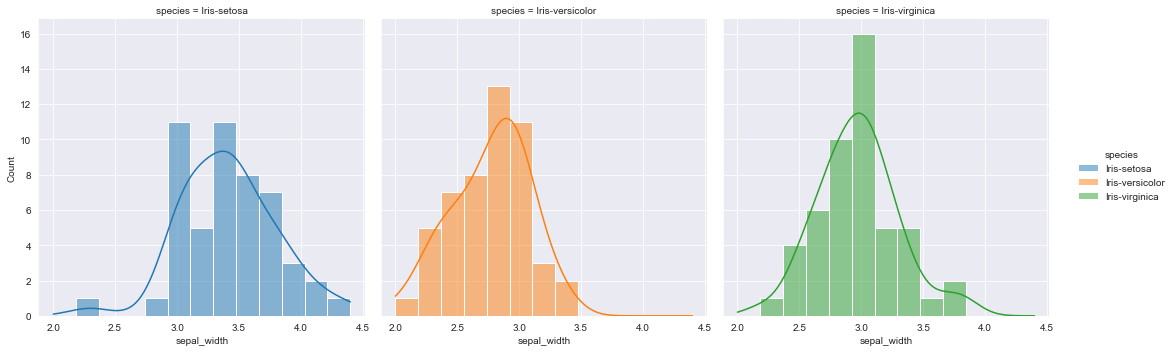

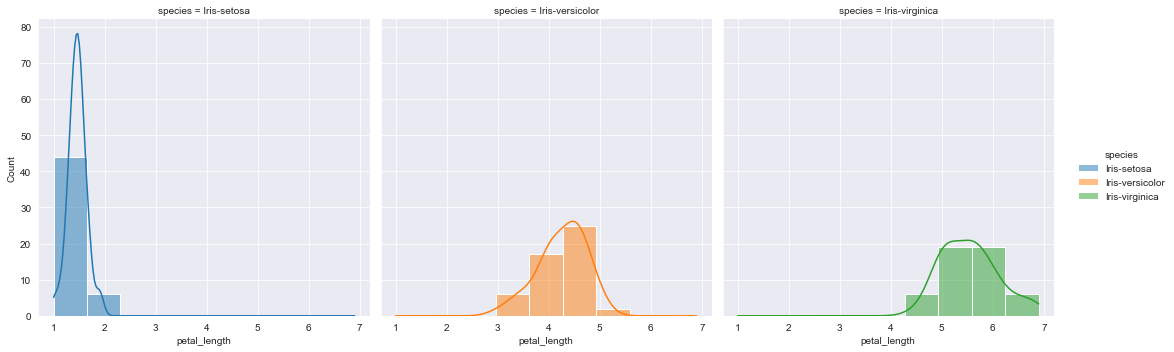

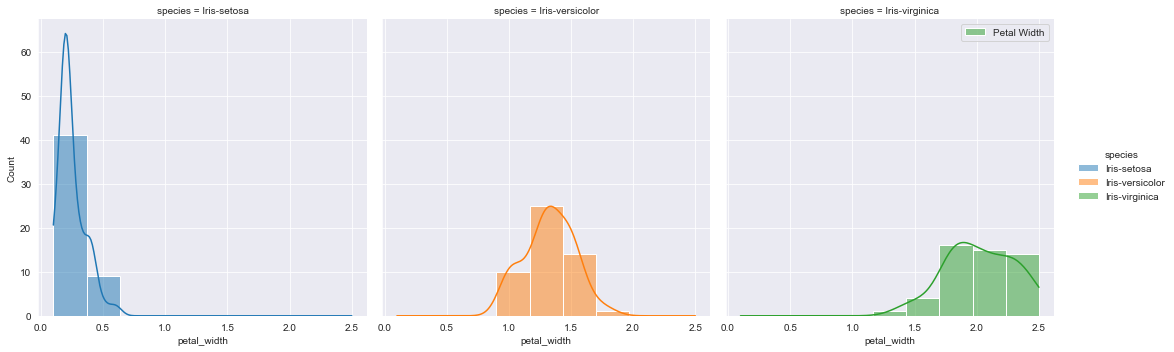

In [29]:
# Density distribution plots for different features on individually basis
plt.figure(figsize=(10, 6))

sns.displot(data=df, x='sepal_length', label='Sepal Length', hue = 'species', col = 'species', kde=True)
sns.displot(data=df, x='sepal_width', label='Sepal Width', hue = 'species', col = 'species', kde=True)
sns.displot(data=df, x='petal_length', label='Petal Length', hue = 'species', col = 'species', kde=True)
sns.displot(data=df, x='petal_width', label='Petal Width', hue = 'species', col = 'species', kde=True)


plt.legend()
plt.show()

In [30]:
# Correlation Matrix
corr_matrix = df.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

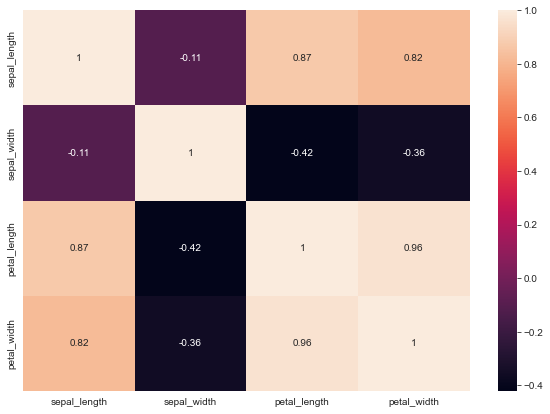

In [31]:
# plt.figure(figsize = (10, 10))
fig,ax = plt.subplots(figsize = (10, 7))
sns.heatmap(corr_matrix, annot = True, ax = ax, cmap=None)


# 4) Perform Machine Learning Algorithms

In [32]:
# As the output Species is in catogorical form(object type) we are converting them to a numerical form for that
# we use label encoder
le_model = LabelEncoder()                  # initialize the object 

In [33]:
df['species'] = le_model.fit_transform(df['species'])                # transform the label(species) 
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
features = df.iloc[:, :4]     # features = df[['sepal_length', 'sepal_length', 'sepal_length', 'petal_width']]
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
label = df['species']

### Model Train and Test

In [36]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 3)

### Logistic Regression Algorithm

In [37]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)            # Initialize the object 

In [38]:
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
y_pred = log_model.predict(x_test)
for test in y_pred:
    print("->",test)

-> 0
-> 0
-> 0
-> 0
-> 0
-> 2
-> 1
-> 0
-> 2
-> 1
-> 1
-> 0
-> 1
-> 1
-> 2
-> 0
-> 1
-> 2
-> 2
-> 0
-> 2
-> 2
-> 2
-> 1
-> 0
-> 2
-> 2
-> 1
-> 1
-> 1


In [40]:
log_model.score(x_test, y_test)*100

100.0

In [41]:
y_test.values

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1])

In [42]:
# Confusion Matrix   (TP, TN, FP, FN)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [43]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [44]:
# Without feature scaling, model has 100% accuracy prediction

### Feature Scaling

In [45]:
minmax_model = MinMaxScaler()

In [46]:
X_train = minmax_model.fit_transform(x_train) # It's often used on the training data to learn the required parameters 
# and apply the transformation  and then the same transformation (using the parameters learned from the training data) 
# is applied to the testing or validation data. (fit_transform)

In [47]:
X_test = minmax_model.transform(x_test) # When working with the testing or validation data, you should only use 
# the transform method to apply the transformation learned from the training data, without recalculating the parameters.

In [48]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [49]:
y_pred = log_model.predict(X_test)
for test in y_pred:
    print("->",test)

-> 0
-> 0
-> 0
-> 0
-> 0
-> 2
-> 1
-> 0
-> 2
-> 1
-> 1
-> 0
-> 1
-> 1
-> 2
-> 0
-> 1
-> 2
-> 2
-> 0
-> 2
-> 2
-> 2
-> 1
-> 0
-> 2
-> 1
-> 1
-> 1
-> 2


In [50]:
score_log = log_model.score(X_test, y_test)*100
score_log
# accuracy = accuracy_score(y_test, y_pred)*100
# accuracy

93.33333333333333

In [51]:
accuracy = accuracy_score(y_test, y_pred)*100
accuracy

93.33333333333333

In [52]:
# Confusion Matrix   (TP, TN, FP, FN)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]], dtype=int64)

In [53]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Support Vector Machine Algorithm

In [54]:
svc = SVC()

In [55]:
svc.fit(X_train, y_train)

SVC()

In [56]:
y_pred = svc.predict(X_test)
for test in y_pred:
    print("->",test)

-> 0
-> 0
-> 0
-> 0
-> 0
-> 2
-> 1
-> 0
-> 2
-> 1
-> 1
-> 0
-> 1
-> 1
-> 2
-> 0
-> 1
-> 2
-> 2
-> 0
-> 2
-> 2
-> 2
-> 1
-> 0
-> 2
-> 2
-> 1
-> 1
-> 1


In [57]:
score_svc = svc.score(X_test, y_test)*100
score_svc

100.0

In [58]:
# Confusion Matrix   (TP, TN, FP, FN)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [59]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### KNeighbors Classifier Algorithm

In [60]:
knn = KNeighborsClassifier()

In [61]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
y_pred = knn.predict(X_test)

In [63]:
score_knn = knn.score(X_test, y_test)*100
score_knn
# accuracy = accuracy_score(y_test, y_pred)
# accuracy

96.66666666666667

In [64]:
# Confusion Matrix   (TP, TN, FP, FN)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

In [65]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [66]:
# In above Classififcation report, following metrics are shown:
# for class 0, the precision is 1.00, meaning all predicted class 0 instances were true positives.(Precision)
# for class 1, the recall is 1.00, meaning all actual class 1 instances were correctly predicted. (Recall)
# The F1-score is the harmonic mean of precision and recall (F-1 score)
# For example, there are 10 instances of each class in this case. (Support)
# Overall accuracy of the model, which is the ratio of correct predictions to the total number of predictions.
# The accuracy here is 0.97, or 97%. (Accuracy)
# This is the average of precision, recall, and F1-score calculated separately for each class (Macro Avg)
# Similar to the macro average, but takes into account the number of instances in each class. This is useful when 
# classes have different sizes. (weighted avg)

In [67]:
# Thus SVC has 100% prediction accuracy and KNeighborsClassifier has 97%. 

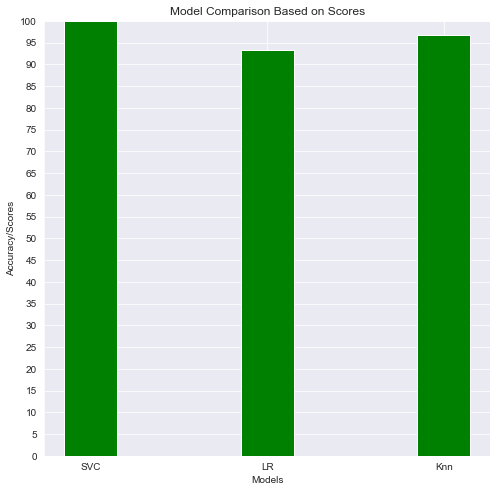

In [68]:
# Visualize all three models accuracy based on their scores

model = ['SVC', 'LR', 'Knn']
score = [score_svc, score_log, score_knn]

plt.figure(figsize=(8, 8))
plt.bar(model, score, color='g', width = 0.3)
plt.title('Model Comparison Based on Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy/Scores')
plt.ylim(0, 1)  # Set the y-axis limit to the range of scores (0 to 1)
#plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.grid(True)
plt.yticks(np.arange(0, 105, 5))
plt.show()

# THANK YOU!